### Notebook Setup

In [159]:
#Import libraries

import pandas as pd
import numpy as np

import json
import requests # library to handle requests
from requests import get
import re # Regular expression
import ast

import matplotlib.pyplot as plt
import seaborn as sns

from itertools import islice
from geopy.geocoders import Nominatim

# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

from bs4 import BeautifulSoup

In [2]:
pd.set_option('display.max_colwidth', None, 'display.max_rows', None)

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

___

### 1. Scrape data from online

In [4]:
#1.#https://www.rightmove.co.uk/property-for-sale/find.html?locationIdentifier=REGION%5E972&maxBedrooms=5&maxPrice=800000&minPrice=350000&index=24&propertyTypes=&includeSSTC=false&mustHave=&dontShow=newHome%2CsharedOwnership%2Cretirement&furnishTypes=&keywords=

#2#https://www.rightmove.co.uk/property-for-sale/find.html?locationIdentifier=REGION%5E94441&maxPrice=1000000&minPrice=300000&index=24&propertyTypes=detached%2Cflat%2Csemi-detached%2Cterraced&secondaryDisplayPropertyType=housesandflats&includeSSTC=false&mustHave=&dontShow=retirement&furnishTypes=&keywords=

#KT area: https://en.wikipedia.org/wiki/KT_postcode_area

all_data = pd.DataFrame([])

base_url= ("https://www.rightmove.co.uk/property-for-sale/find.html?locationIdentifier=REGION%5E94441&maxPrice=1000000&minPrice=300000&index=24&propertyTypes=detached%2Cflat%2Csemi-detached%2Cterraced&secondaryDisplayPropertyType=housesandflats&includeSSTC=false&mustHave=&dontShow=retirement&furnishTypes=&keywords=")

results = requests.get(base_url).text
soup = BeautifulSoup(results, "html.parser")

find = soup.find_all("script")

reg = r"window.jsonModel\s+=\s+(\{.*?\</script>)"

pattern = re.compile(reg)
match = pattern.findall(str(find))

match_strip = match[0].rstrip("</script>")

s1 = json.dumps(match_strip)
json_data = json.loads(s1) 

s3 = json.loads(str(json_data))

pagination =  s3.get("pagination").get("options")

pagination = pd.DataFrame(pagination)



for value in islice(pagination.iloc[:,0],0,42):
    print(value)

    iter_url = "https://www.rightmove.co.uk/property-for-sale/find.html?locationIdentifier=REGION%5E94441&maxPrice=1000000&minPrice=300000&index={}&propertyTypes=detached%2Cflat%2Csemi-detached%2Cterraced&secondaryDisplayPropertyType=housesandflats&includeSSTC=false&mustHave=&dontShow=retirement&furnishTypes=&keywords=".format(value)
    
   
   
    results = requests.get(iter_url).text
    soup = BeautifulSoup(results, "html.parser")
    
    find = soup.find_all("script")
    
    reg = r"window.jsonModel\s+=\s+(\{.*?\</script>)"

    pattern = re.compile(reg)
    match = pattern.findall(str(find))

    match_strip = match[0].rstrip("</script>")

    s1 = json.dumps(match_strip)
    json_data = json.loads(s1) 

    s3 = json.loads(str(json_data))
    
    list =  s3.get("properties")
    
    df = pd.DataFrame(list)
    df.drop(["propertyImages"], axis=1, inplace=True)

    all_data = all_data.append(df, ignore_index=True)
    
    
    
    
pd.set_option("display.max_rows", df.shape[0]+1)


all_data.shape
all_data

0
24
48
72
96
120
144
168
192
216
240
264
288
312
336
360
384
408
432
456
480
504
528
552
576
600
624
648
672
696
720
744
768
792
816
840
864
888
912
936
960
984


(1050, 47)

,id,bedrooms,bathrooms,numberOfImages,numberOfFloorplans,numberOfVirtualTours,summary,displayAddress,countryCode,location,...,onlineViewingsAvailable,enhancedListing,propertyTypeFullDescription,heading,displayStatus,formattedBranchName,addedOrReduced,isRecent,formattedDistance,hasBrandPlus
0,89153890,2,1.0,17,1,1,"Located in the heart of the highly desirable College Area of Epsom and within walking distance of the town centre and railway station, this spacious and bright Victorian semi-detached house is offered with our vendor being suited and presented in immaculate order, and with so many stand out featu...","Albert Road, Epsom",GB,"{'latitude': 51.331218, 'longitude': -0.255378}",...,False,False,2 bedroom semi-detached house for sale,Featured Property,,"by The Personal Agent, Epsom",Added on 17/02/2021,False,,True
1,77309661,4,NaN,2,0,1,"*LAUNCHING FEBRUARY 2021* A stylish collection of 1 & 2 bedroom apartments and 3, 4 & 5 bedroom houses in a magnificent tree-lined setting. Located in the sought-after Ashley Park neighbourhood. This is where you can sit back and feel truly at home.",Stompond Lane\r\nWalton-On-Thames\r\nKT12 1HB,GB,"{'latitude': 51.38009, 'longitude': -0.41621}",...,False,False,4 bedroom semi-detached house for sale,,,by London Square,Added on 20/01/2021,False,,True
2,102490706,4,2.0,18,1,1,Seymours of Surbiton are delighted to offer to the market this larger than average semi-detached family house located on one of Surbiton's premier roads.,"Berrylands, Surbiton",GB,"{'latitude': 51.395417, 'longitude': -0.285568}",...,False,False,4 bedroom semi-detached house for sale,,,"by Seymours, South West London",Added on 04/02/2021,False,,True
3,100705121,4,2.0,21,1,0,"An attractive bay fronted four bedroom, two bathroom detached residence peacefully located in a highly sought after cul-de-sac in Woodham within walking distance of West Byfleet village and mainline station.",WOODHAM,GB,"{'latitude': 51.339647, 'longitude': -0.516856}",...,False,False,4 bedroom detached house for sale,,,"by Foundations Independent Est Ltd, Woking - Sales",Reduced on 02/02/2021,False,,True
4,73644852,4,3.0,29,1,1,"Rare opportunity to acquire this wonderful detached family home arranged over three floors with five double bedrooms. Situated on a very desirable residential road in New Malden and offering easy access to New Malden station, the local high street and within the catchment of excellent local schools","Cavendish Road, New Malden",GB,"{'latitude': 51.397959, 'longitude': -0.25357}",...,True,False,4 bedroom detached house for sale,,,"by SeOUL Residential, New Malden",Reduced on 23/12/2020,False,,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,77481750,1,1.0,18,1,0,"Yopa is pleased to present this stylish and very modern one bedroom apartment with exclusive views over Kingston town, use of fitness facilities, 24 hr concierge and use of garden. The property is conveniently located within a short walking distance of mainline stations shopping and bus routes.","Queenshurst Square, Kingston Upon Thames",GB,"{'latitude': 51.414873, 'longitude': -0.302503}",...,False,False,1 bedroom flat for sale,,,"by Yopa, London",Added on 29/01/2021,False,,True
1046,75047657,4,1.0,9,1,1,** WE ARE STILL OPEN PLEASE CALL FOR VIEWINGS AND VALUATIONS ** A skillfully extended four bedroom two bathroom semi-detached family home situated in an elevated position on a desirable residential road in Stoneleigh.,"Firswood Avenue, Stoneleigh",GB,"{'latitude': 51.36273, 'longitude': -0.25481}",...,True,False,4 bedroom semi-detached house for sale,,,"by Barnard Marcus, Ewell",Reduced on 26/12/2020,False,,True
1047,88854358,2,2.0,29,1,1,"Located within the highly regarded Clarendon Park and enjoying an enviable position towards the head of a gated court, The Personal Agent are especially proud to offer this stunning converted mews house benefitting from an impressive 1240 Sq. Ft of light and bright accommodation. Th

In [5]:
s3.get("properties")

[{'id': 75359871,
  'bedrooms': 4,
  'bathrooms': 3,
  'numberOfImages': 27,
  'numberOfFloorplans': 1,
  'numberOfVirtualTours': 0,
  'summary': 'With a deceptive amount of space this stunning period property boasts a wealth of character & charm throughout, split over three floors with a selection of additional outhouses ideal suited for those looking for a home office, gym or playroom. ',
  'displayAddress': 'Weir Road, Chertsey, Surrey, KT16',
  'countryCode': 'GB',
  'location': {'latitude': 51.38851, 'longitude': -0.49511},
  'propertySubType': 'Semi-detached Villa',
  'listingUpdate': {'listingUpdateReason': 'new',
   'listingUpdateDate': '2020-11-17T15:39:03Z'},
  'premiumListing': True,
  'featuredProperty': True,
  'price': {'amount': 685000,
   'frequency': 'not specified',
   'currencyCode': 'GBP',
   'displayPrices': [{'displayPrice': '£685,000',
     'displayPriceQualifier': 'Guide Price'}]},
  'customer': {'branchId': 36200,
   'brandPlusLogoURI': '/37k/36200/branch_logo_

In [6]:
all_data

,id,bedrooms,bathrooms,numberOfImages,numberOfFloorplans,numberOfVirtualTours,summary,displayAddress,countryCode,location,...,onlineViewingsAvailable,enhancedListing,propertyTypeFullDescription,heading,displayStatus,formattedBranchName,addedOrReduced,isRecent,formattedDistance,hasBrandPlus
0,89153890,2,1.0,17,1,1,"Located in the heart of the highly desirable College Area of Epsom and within walking distance of the town centre and railway station, this spacious and bright Victorian semi-detached house is offered with our vendor being suited and presented in immaculate order, and with so many stand out featu...","Albert Road, Epsom",GB,"{'latitude': 51.331218, 'longitude': -0.255378}",...,False,False,2 bedroom semi-detached house for sale,Featured Property,,"by The Personal Agent, Epsom",Added on 17/02/2021,False,,True
1,77309661,4,NaN,2,0,1,"*LAUNCHING FEBRUARY 2021* A stylish collection of 1 & 2 bedroom apartments and 3, 4 & 5 bedroom houses in a magnificent tree-lined setting. Located in the sought-after Ashley Park neighbourhood. This is where you can sit back and feel truly at home.",Stompond Lane\r\nWalton-On-Thames\r\nKT12 1HB,GB,"{'latitude': 51.38009, 'longitude': -0.41621}",...,False,False,4 bedroom semi-detached house for sale,,,by London Square,Added on 20/01/2021,False,,True
2,102490706,4,2.0,18,1,1,Seymours of Surbiton are delighted to offer to the market this larger than average semi-detached family house located on one of Surbiton's premier roads.,"Berrylands, Surbiton",GB,"{'latitude': 51.395417, 'longitude': -0.285568}",...,False,False,4 bedroom semi-detached house for sale,,,"by Seymours, South West London",Added on 04/02/2021,False,,True
3,100705121,4,2.0,21,1,0,"An attractive bay fronted four bedroom, two bathroom detached residence peacefully located in a highly sought after cul-de-sac in Woodham within walking distance of West Byfleet village and mainline station.",WOODHAM,GB,"{'latitude': 51.339647, 'longitude': -0.516856}",...,False,False,4 bedroom detached house for sale,,,"by Foundations Independent Est Ltd, Woking - Sales",Reduced on 02/02/2021,False,,True
4,73644852,4,3.0,29,1,1,"Rare opportunity to acquire this wonderful detached family home arranged over three floors with five double bedrooms. Situated on a very desirable residential road in New Malden and offering easy access to New Malden station, the local high street and within the catchment of excellent local schools","Cavendish Road, New Malden",GB,"{'latitude': 51.397959, 'longitude': -0.25357}",...,True,False,4 bedroom detached house for sale,,,"by SeOUL Residential, New Malden",Reduced on 23/12/2020,False,,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,77481750,1,1.0,18,1,0,"Yopa is pleased to present this stylish and very modern one bedroom apartment with exclusive views over Kingston town, use of fitness facilities, 24 hr concierge and use of garden. The property is conveniently located within a short walking distance of mainline stations shopping and bus routes.","Queenshurst Square, Kingston Upon Thames",GB,"{'latitude': 51.414873, 'longitude': -0.302503}",...,False,False,1 bedroom flat for sale,,,"by Yopa, London",Added on 29/01/2021,False,,True
1046,75047657,4,1.0,9,1,1,** WE ARE STILL OPEN PLEASE CALL FOR VIEWINGS AND VALUATIONS ** A skillfully extended four bedroom two bathroom semi-detached family home situated in an elevated position on a desirable residential road in Stoneleigh.,"Firswood Avenue, Stoneleigh",GB,"{'latitude': 51.36273, 'longitude': -0.25481}",...,True,False,4 bedroom semi-detached house for sale,,,"by Barnard Marcus, Ewell",Reduced on 26/12/2020,False,,True
1047,88854358,2,2.0,29,1,1,"Located within the highly regarded Clarendon Park and enjoying an enviable position towards the head of a gated court, The Personal Agent are especially proud to offer this stunning converted mews house benefitting from an impressive 1240 Sq. Ft of light and bright accommodation. Th

___

### 2. Pre-process Data

In [86]:
raw_data = all_data
raw_data.columns.tolist()

['id',
 'bedrooms',
 'bathrooms',
 'numberOfImages',
 'numberOfFloorplans',
 'numberOfVirtualTours',
 'summary',
 'displayAddress',
 'countryCode',
 'location',
 'propertySubType',
 'listingUpdate',
 'premiumListing',
 'featuredProperty',
 'price',
 'customer',
 'distance',
 'transactionType',
 'productLabel',
 'commercial',
 'development',
 'residential',
 'students',
 'auction',
 'feesApply',
 'feesApplyText',
 'displaySize',
 'showOnMap',
 'propertyUrl',
 'contactUrl',
 'staticMapUrl',
 'channel',
 'firstVisibleDate',
 'keywords',
 'keywordMatchType',
 'saved',
 'hidden',
 'onlineViewingsAvailable',
 'enhancedListing',
 'propertyTypeFullDescription',
 'heading',
 'displayStatus',
 'formattedBranchName',
 'addedOrReduced',
 'isRecent',
 'formattedDistance',
 'hasBrandPlus']

**Remove duplicated property listings by IDs**

In [87]:
raw_data.duplicated(subset=['id']).value_counts()
"""
Duplicate IDs exist when the listing is also a featured listing at the top of any page. IDs should be unique.
"""

False    1026
dtype: int64

'\nDuplicate IDs exist when the listing is also a featured listing at the top of any page. IDs should be unique.\n'

In [88]:
#Drop duplicates
raw_data.drop_duplicates(subset="id", inplace=True)
#Check for duplicates
raw_data.duplicated(subset=['id']).value_counts()

False    1026
dtype: int64

**Grab only required columns**

In [89]:
#Rather than dropping, choose which columns to keep
df_subset = raw_data.loc[:, ["id", "bedrooms", "bathrooms", "location", "propertySubType", "price", "auction", "channel", "productLabel" ]]
print(df_subset.shape)
df_subset

(1026, 9)


,id,bedrooms,bathrooms,location,propertySubType,price,auction,channel,productLabel
0,89153890,2,1.0,"{'latitude': 51.331218, 'longitude': -0.255378}",Semi-Detached,"{'amount': 535000, 'frequency': 'not specified', 'currencyCode': 'GBP', 'displayPrices': [{'displayPrice': '£535,000', 'displayPriceQualifier': 'Offers Over'}]}",False,BUY,"{'productLabelText': 'Video Tour', 'spotlightLabel': False}"
1,77309661,4,NaN,"{'latitude': 51.38009, 'longitude': -0.41621}",Semi-Detached,"{'amount': 1000000, 'frequency': 'not specified', 'currencyCode': 'GBP', 'displayPrices': [{'displayPrice': 'Coming Soon', 'displayPriceQualifier': ''}]}",False,BUY,"{'productLabelText': 'Coming Soon', 'spotlightLabel': True}"
2,102490706,4,2.0,"{'latitude': 51.395417, 'longitude': -0.285568}",Semi-Detached,"{'amount': 1000000, 'frequency': 'not specified', 'currencyCode': 'GBP', 'displayPrices': [{'displayPrice': '£1,000,000', 'displayPriceQualifier': 'Guide Price'}]}",False,BUY,"{'productLabelText': 'Video Tour', 'spotlightLabel': False}"
3,100705121,4,2.0,"{'latitude': 51.339647, 'longitude': -0.516856}",Detached,"{'amount': 1000000, 'frequency': 'not specified', 'currencyCode': 'GBP', 'displayPrices': [{'displayPrice': '£1,000,000', 'displayPriceQualifier': ''}]}",False,BUY,"{'productLabelText': 'Premium Listing', 'spotlightLabel': False}"
4,73644852,4,3.0,"{'latitude': 51.397959, 'longitude': -0.25357}",Detached,"{'amount': 1000000, 'frequency': 'not specified', 'currencyCode': 'GBP', 'displayPrices': [{'displayPrice': '£1,000,000', 'displayPriceQualifier': ''}]}",False,BUY,"{'productLabelText': 'No Chain', 'spotlightLabel': False}"
...,...,...,...,...,...,...,...,...,...
1045,77481750,1,1.0,"{'latitude': 51.414873, 'longitude': -0.302503}",Flat,"{'amount': 550000, 'frequency': 'not specified', 'currencyCode': 'GBP', 'displayPrices': [{'displayPrice': '£550,000', 'displayPriceQualifier': 'Guide Price'}]}",False,BUY,"{'productLabelText': 'Premium Listing', 'spotlightLabel': False}"
1046,75047657,4,1.0,"{'latitude': 51.36273, 'longitude': -0.25481}",Semi-Detached,"{'amount': 550000, 'frequency': 'not specified', 'currencyCode': 'GBP', 'displayPrices': [{'displayPrice': '£550,000', 'displayPriceQualifier': 'Offers in Excess of'}]}",False,BUY,"{'productLabelText': 'Extended', 'spotlightLabel': False}"
1047,88854358,2,2.0,"{'latitude': 51.349151, 'longitude': -0.286163}",Terraced,"{'amount': 550000, 'frequency': 'not specified', 'currencyCode': 'GBP', 'displayPrices': [{'displayPrice': '£550,000', 'displayPriceQualifier': 'Guide Price'}]}",False,BUY,"{'productLabelText': 'Premium Listing', 'spotlightLabel': False}"
1048,97376837,2,1.0,"{'latitude': 51.41039, 'longitude': -0.30675}",Flat,"{'amount': 550000, 'frequency': 'not specified', 'currencyCode': 'GBP', 'displayPrices': [{'displayPrice': '£550,000', 'displayPriceQualifier': ''}]}",False,BUY,"{'productLabelText': '', 'spotlightLabel': False}"


**Drop Auction properties**

In [90]:
auction_drop = df_subset.loc[df_subset["auction"] !=False]
auction_drop

print("number of auction listings dropped: ", auction_drop.shape[0])

df_subset = df_subset.drop(df_subset.index[auction_drop.index])
df_subset.shape


#Alt
# df_subset = df_subset[df_subset["auction"] == False]
# print("Deleted rows: " , df_subset[df_subset["auction"] != False].shape[0])
# print(df_subset.shape)

,id,bedrooms,bathrooms,location,propertySubType,price,auction,channel,productLabel
643,102525533,4,2.0,"{'latitude': 51.35049, 'longitude': -0.255419}",Detached,"{'amount': 650000, 'frequency': 'not specified', 'currencyCode': 'GBP', 'displayPrices': [{'displayPrice': '£650,000', 'displayPriceQualifier': 'Guide Price'}]}",True,BUY,"{'productLabelText': 'New Listing', 'spotlightLabel': False}"


number of auction listings dropped:  1


(1025, 9)

**Drop any non-Buy properties**

In [91]:
print("Delete rows: " , df_subset[df_subset["channel"] != "BUY"].shape[0])
df_subset = df_subset[df_subset["channel"] == "BUY"]
print(df_subset.shape)

Delete rows:  0
(1025, 9)


**Search and drop Null values**

For now drop rows where the bathroom value is NaN.    
For next time: See if you can best approximate the number of bathrooms based on property type and number of bedrooms and maybe also price of property.

In [92]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1025 entries, 0 to 1049
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1025 non-null   int64  
 1   bedrooms         1025 non-null   int64  
 2   bathrooms        940 non-null    float64
 3   location         1025 non-null   object 
 4   propertySubType  1025 non-null   object 
 5   price            1025 non-null   object 
 6   auction          1025 non-null   bool   
 7   channel          1025 non-null   object 
 8   productLabel     1025 non-null   object 
dtypes: bool(1), float64(1), int64(2), object(5)
memory usage: 73.1+ KB


In [93]:
df_subset["bathrooms"].value_counts(dropna = False)

2.0    512
1.0    261
3.0    124
NaN     85
0.0     31
4.0     11
5.0      1
Name: bathrooms, dtype: int64

In [94]:
df_subset["bathrooms"].value_counts(dropna = False, normalize = True)

2.0    0.499512
1.0    0.254634
3.0    0.120976
NaN    0.082927
0.0    0.030244
4.0    0.010732
5.0    0.000976
Name: bathrooms, dtype: float64

In [95]:
df_subset.dropna(subset=["bathrooms"], inplace=True)
df_subset.shape

(940, 9)

In [96]:
df_subset

,id,bedrooms,bathrooms,location,propertySubType,price,auction,channel,productLabel
0,89153890,2,1.0,"{'latitude': 51.331218, 'longitude': -0.255378}",Semi-Detached,"{'amount': 535000, 'frequency': 'not specified', 'currencyCode': 'GBP', 'displayPrices': [{'displayPrice': '£535,000', 'displayPriceQualifier': 'Offers Over'}]}",False,BUY,"{'productLabelText': 'Video Tour', 'spotlightLabel': False}"
2,102490706,4,2.0,"{'latitude': 51.395417, 'longitude': -0.285568}",Semi-Detached,"{'amount': 1000000, 'frequency': 'not specified', 'currencyCode': 'GBP', 'displayPrices': [{'displayPrice': '£1,000,000', 'displayPriceQualifier': 'Guide Price'}]}",False,BUY,"{'productLabelText': 'Video Tour', 'spotlightLabel': False}"
3,100705121,4,2.0,"{'latitude': 51.339647, 'longitude': -0.516856}",Detached,"{'amount': 1000000, 'frequency': 'not specified', 'currencyCode': 'GBP', 'displayPrices': [{'displayPrice': '£1,000,000', 'displayPriceQualifier': ''}]}",False,BUY,"{'productLabelText': 'Premium Listing', 'spotlightLabel': False}"
4,73644852,4,3.0,"{'latitude': 51.397959, 'longitude': -0.25357}",Detached,"{'amount': 1000000, 'frequency': 'not specified', 'currencyCode': 'GBP', 'displayPrices': [{'displayPrice': '£1,000,000', 'displayPriceQualifier': ''}]}",False,BUY,"{'productLabelText': 'No Chain', 'spotlightLabel': False}"
5,86007409,4,2.0,"{'latitude': 51.3791, 'longitude': -0.342057}",Detached,"{'amount': 1000000, 'frequency': 'not specified', 'currencyCode': 'GBP', 'displayPrices': [{'displayPrice': '£1,000,000', 'displayPriceQualifier': 'Offers in Region of'}]}",False,BUY,"{'productLabelText': 'Potential to extend (STPP)', 'spotlightLabel': False}"
...,...,...,...,...,...,...,...,...,...
1045,77481750,1,1.0,"{'latitude': 51.414873, 'longitude': -0.302503}",Flat,"{'amount': 550000, 'frequency': 'not specified', 'currencyCode': 'GBP', 'displayPrices': [{'displayPrice': '£550,000', 'displayPriceQualifier': 'Guide Price'}]}",False,BUY,"{'productLabelText': 'Premium Listing', 'spotlightLabel': False}"
1046,75047657,4,1.0,"{'latitude': 51.36273, 'longitude': -0.25481}",Semi-Detached,"{'amount': 550000, 'frequency': 'not specified', 'currencyCode': 'GBP', 'displayPrices': [{'displayPrice': '£550,000', 'displayPriceQualifier': 'Offers in Excess of'}]}",False,BUY,"{'productLabelText': 'Extended', 'spotlightLabel': False}"
1047,88854358,2,2.0,"{'latitude': 51.349151, 'longitude': -0.286163}",Terraced,"{'amount': 550000, 'frequency': 'not specified', 'currencyCode': 'GBP', 'displayPrices': [{'displayPrice': '£550,000', 'displayPriceQualifier': 'Guide Price'}]}",False,BUY,"{'productLabelText': 'Premium Listing', 'spotlightLabel': False}"
1048,97376837,2,1.0,"{'latitude': 51.41039, 'longitude': -0.30675}",Flat,"{'amount': 550000, 'frequency': 'not specified', 'currencyCode': 'GBP', 'displayPrices': [{'displayPrice': '£550,000', 'displayPriceQualifier': ''}]}",False,BUY,"{'productLabelText': '', 'spotlightLabel': False}"


**Drop auction and channel columns as no longer required**  

For practice, convert auction column to numerical binary}

In [97]:
#For practice, convert auction column to numerical binary
df_subset['auction'] = (df_subset['auction'] == 'TRUE').astype(int)
df_subset

,id,bedrooms,bathrooms,location,propertySubType,price,auction,channel,productLabel
0,89153890,2,1.0,"{'latitude': 51.331218, 'longitude': -0.255378}",Semi-Detached,"{'amount': 535000, 'frequency': 'not specified', 'currencyCode': 'GBP', 'displayPrices': [{'displayPrice': '£535,000', 'displayPriceQualifier': 'Offers Over'}]}",0,BUY,"{'productLabelText': 'Video Tour', 'spotlightLabel': False}"
2,102490706,4,2.0,"{'latitude': 51.395417, 'longitude': -0.285568}",Semi-Detached,"{'amount': 1000000, 'frequency': 'not specified', 'currencyCode': 'GBP', 'displayPrices': [{'displayPrice': '£1,000,000', 'displayPriceQualifier': 'Guide Price'}]}",0,BUY,"{'productLabelText': 'Video Tour', 'spotlightLabel': False}"
3,100705121,4,2.0,"{'latitude': 51.339647, 'longitude': -0.516856}",Detached,"{'amount': 1000000, 'frequency': 'not specified', 'currencyCode': 'GBP', 'displayPrices': [{'displayPrice': '£1,000,000', 'displayPriceQualifier': ''}]}",0,BUY,"{'productLabelText': 'Premium Listing', 'spotlightLabel': False}"
4,73644852,4,3.0,"{'latitude': 51.397959, 'longitude': -0.25357}",Detached,"{'amount': 1000000, 'frequency': 'not specified', 'currencyCode': 'GBP', 'displayPrices': [{'displayPrice': '£1,000,000', 'displayPriceQualifier': ''}]}",0,BUY,"{'productLabelText': 'No Chain', 'spotlightLabel': False}"
5,86007409,4,2.0,"{'latitude': 51.3791, 'longitude': -0.342057}",Detached,"{'amount': 1000000, 'frequency': 'not specified', 'currencyCode': 'GBP', 'displayPrices': [{'displayPrice': '£1,000,000', 'displayPriceQualifier': 'Offers in Region of'}]}",0,BUY,"{'productLabelText': 'Potential to extend (STPP)', 'spotlightLabel': False}"
...,...,...,...,...,...,...,...,...,...
1045,77481750,1,1.0,"{'latitude': 51.414873, 'longitude': -0.302503}",Flat,"{'amount': 550000, 'frequency': 'not specified', 'currencyCode': 'GBP', 'displayPrices': [{'displayPrice': '£550,000', 'displayPriceQualifier': 'Guide Price'}]}",0,BUY,"{'productLabelText': 'Premium Listing', 'spotlightLabel': False}"
1046,75047657,4,1.0,"{'latitude': 51.36273, 'longitude': -0.25481}",Semi-Detached,"{'amount': 550000, 'frequency': 'not specified', 'currencyCode': 'GBP', 'displayPrices': [{'displayPrice': '£550,000', 'displayPriceQualifier': 'Offers in Excess of'}]}",0,BUY,"{'productLabelText': 'Extended', 'spotlightLabel': False}"
1047,88854358,2,2.0,"{'latitude': 51.349151, 'longitude': -0.286163}",Terraced,"{'amount': 550000, 'frequency': 'not specified', 'currencyCode': 'GBP', 'displayPrices': [{'displayPrice': '£550,000', 'displayPriceQualifier': 'Guide Price'}]}",0,BUY,"{'productLabelText': 'Premium Listing', 'spotlightLabel': False}"
1048,97376837,2,1.0,"{'latitude': 51.41039, 'longitude': -0.30675}",Flat,"{'amount': 550000, 'frequency': 'not specified', 'currencyCode': 'GBP', 'displayPrices': [{'displayPrice': '£550,000', 'displayPriceQualifier': ''}]}",0,BUY,"{'productLabelText': '', 'spotlightLabel': False}"


**Drop Auction and Channel columns as they are not required**

In [98]:
df_subset.drop(["auction", "channel"], inplace=True, axis=1)
df_subset

,id,bedrooms,bathrooms,location,propertySubType,price,productLabel
0,89153890,2,1.0,"{'latitude': 51.331218, 'longitude': -0.255378}",Semi-Detached,"{'amount': 535000, 'frequency': 'not specified', 'currencyCode': 'GBP', 'displayPrices': [{'displayPrice': '£535,000', 'displayPriceQualifier': 'Offers Over'}]}","{'productLabelText': 'Video Tour', 'spotlightLabel': False}"
2,102490706,4,2.0,"{'latitude': 51.395417, 'longitude': -0.285568}",Semi-Detached,"{'amount': 1000000, 'frequency': 'not specified', 'currencyCode': 'GBP', 'displayPrices': [{'displayPrice': '£1,000,000', 'displayPriceQualifier': 'Guide Price'}]}","{'productLabelText': 'Video Tour', 'spotlightLabel': False}"
3,100705121,4,2.0,"{'latitude': 51.339647, 'longitude': -0.516856}",Detached,"{'amount': 1000000, 'frequency': 'not specified', 'currencyCode': 'GBP', 'displayPrices': [{'displayPrice': '£1,000,000', 'displayPriceQualifier': ''}]}","{'productLabelText': 'Premium Listing', 'spotlightLabel': False}"
4,73644852,4,3.0,"{'latitude': 51.397959, 'longitude': -0.25357}",Detached,"{'amount': 1000000, 'frequency': 'not specified', 'currencyCode': 'GBP', 'displayPrices': [{'displayPrice': '£1,000,000', 'displayPriceQualifier': ''}]}","{'productLabelText': 'No Chain', 'spotlightLabel': False}"
5,86007409,4,2.0,"{'latitude': 51.3791, 'longitude': -0.342057}",Detached,"{'amount': 1000000, 'frequency': 'not specified', 'currencyCode': 'GBP', 'displayPrices': [{'displayPrice': '£1,000,000', 'displayPriceQualifier': 'Offers in Region of'}]}","{'productLabelText': 'Potential to extend (STPP)', 'spotlightLabel': False}"
...,...,...,...,...,...,...,...
1045,77481750,1,1.0,"{'latitude': 51.414873, 'longitude': -0.302503}",Flat,"{'amount': 550000, 'frequency': 'not specified', 'currencyCode': 'GBP', 'displayPrices': [{'displayPrice': '£550,000', 'displayPriceQualifier': 'Guide Price'}]}","{'productLabelText': 'Premium Listing', 'spotlightLabel': False}"
1046,75047657,4,1.0,"{'latitude': 51.36273, 'longitude': -0.25481}",Semi-Detached,"{'amount': 550000, 'frequency': 'not specified', 'currencyCode': 'GBP', 'displayPrices': [{'displayPrice': '£550,000', 'displayPriceQualifier': 'Offers in Excess of'}]}","{'productLabelText': 'Extended', 'spotlightLabel': False}"
1047,88854358,2,2.0,"{'latitude': 51.349151, 'longitude': -0.286163}",Terraced,"{'amount': 550000, 'frequency': 'not specified', 'currencyCode': 'GBP', 'displayPrices': [{'displayPrice': '£550,000', 'displayPriceQualifier': 'Guide Price'}]}","{'productLabelText': 'Premium Listing', 'spotlightLabel': False}"
1048,97376837,2,1.0,"{'latitude': 51.41039, 'longitude': -0.30675}",Flat,"{'amount': 550000, 'frequency': 'not specified', 'currencyCode': 'GBP', 'displayPrices': [{'displayPrice': '£550,000', 'displayPriceQualifier': ''}]}","{'productLabelText': '', 'spotlightLabel': False}"


**Using data in Location - Create a Lat and Long column**

In [99]:
#pd.json_normalize(df.location) is significantly faster than df.location.apply(pd.Series)

df_subset = pd.concat([df_subset.drop(['location'], axis=1), df_subset['location'].apply(pd.Series)], axis=1)
df_subset

,id,bedrooms,bathrooms,propertySubType,price,productLabel,latitude,longitude
0,89153890,2,1.0,Semi-Detached,"{'amount': 535000, 'frequency': 'not specified', 'currencyCode': 'GBP', 'displayPrices': [{'displayPrice': '£535,000', 'displayPriceQualifier': 'Offers Over'}]}","{'productLabelText': 'Video Tour', 'spotlightLabel': False}",51.331218,-0.255378
2,102490706,4,2.0,Semi-Detached,"{'amount': 1000000, 'frequency': 'not specified', 'currencyCode': 'GBP', 'displayPrices': [{'displayPrice': '£1,000,000', 'displayPriceQualifier': 'Guide Price'}]}","{'productLabelText': 'Video Tour', 'spotlightLabel': False}",51.395417,-0.285568
3,100705121,4,2.0,Detached,"{'amount': 1000000, 'frequency': 'not specified', 'currencyCode': 'GBP', 'displayPrices': [{'displayPrice': '£1,000,000', 'displayPriceQualifier': ''}]}","{'productLabelText': 'Premium Listing', 'spotlightLabel': False}",51.339647,-0.516856
4,73644852,4,3.0,Detached,"{'amount': 1000000, 'frequency': 'not specified', 'currencyCode': 'GBP', 'displayPrices': [{'displayPrice': '£1,000,000', 'displayPriceQualifier': ''}]}","{'productLabelText': 'No Chain', 'spotlightLabel': False}",51.397959,-0.253570
5,86007409,4,2.0,Detached,"{'amount': 1000000, 'frequency': 'not specified', 'currencyCode': 'GBP', 'displayPrices': [{'displayPrice': '£1,000,000', 'displayPriceQualifier': 'Offers in Region of'}]}","{'productLabelText': 'Potential to extend (STPP)', 'spotlightLabel': False}",51.379100,-0.342057
...,...,...,...,...,...,...,...,...
1045,77481750,1,1.0,Flat,"{'amount': 550000, 'frequency': 'not specified', 'currencyCode': 'GBP', 'displayPrices': [{'displayPrice': '£550,000', 'displayPriceQualifier': 'Guide Price'}]}","{'productLabelText': 'Premium Listing', 'spotlightLabel': False}",51.414873,-0.302503
1046,75047657,4,1.0,Semi-Detached,"{'amount': 550000, 'frequency': 'not specified', 'currencyCode': 'GBP', 'displayPrices': [{'displayPrice': '£550,000', 'displayPriceQualifier': 'Offers in Excess of'}]}","{'productLabelText': 'Extended', 'spotlightLabel': False}",51.362730,-0.254810
1047,88854358,2,2.0,Terraced,"{'amount': 550000, 'frequency': 'not specified', 'currencyCode': 'GBP', 'displayPrices': [{'displayPrice': '£550,000', 'displayPriceQualifier': 'Guide Price'}]}","{'productLabelText': 'Premium Listing', 'spotlightLabel': False}",51.349151,-0.286163
1048,97376837,2,1.0,Flat,"{'amount': 550000, 'frequency': 'not specified', 'currencyCode': 'GBP', 'displayPrices': [{'displayPrice': '£550,000', 'displayPriceQualifier': ''}]}","{'productLabelText': '', 'spotlightLabel': False}",51.410390,-0.306750


In [100]:
df_subset = pd.concat([df_subset.drop(['price'], axis=1), df_subset['price'].apply(pd.Series)], axis=1)
df_subset.drop(["frequency", "currencyCode", "displayPrices"], axis =1, inplace=True)
df_subset

,id,bedrooms,bathrooms,propertySubType,productLabel,latitude,longitude,amount
0,89153890,2,1.0,Semi-Detached,"{'productLabelText': 'Video Tour', 'spotlightLabel': False}",51.331218,-0.255378,535000
2,102490706,4,2.0,Semi-Detached,"{'productLabelText': 'Video Tour', 'spotlightLabel': False}",51.395417,-0.285568,1000000
3,100705121,4,2.0,Detached,"{'productLabelText': 'Premium Listing', 'spotlightLabel': False}",51.339647,-0.516856,1000000
4,73644852,4,3.0,Detached,"{'productLabelText': 'No Chain', 'spotlightLabel': False}",51.397959,-0.253570,1000000
5,86007409,4,2.0,Detached,"{'productLabelText': 'Potential to extend (STPP)', 'spotlightLabel': False}",51.379100,-0.342057,1000000
...,...,...,...,...,...,...,...,...
1045,77481750,1,1.0,Flat,"{'productLabelText': 'Premium Listing', 'spotlightLabel': False}",51.414873,-0.302503,550000
1046,75047657,4,1.0,Semi-Detached,"{'productLabelText': 'Extended', 'spotlightLabel': False}",51.362730,-0.254810,550000
1047,88854358,2,2.0,Terraced,"{'productLabelText': 'Premium Listing', 'spotlightLabel': False}",51.349151,-0.286163,550000
1048,97376837,2,1.0,Flat,"{'productLabelText': '', 'spotlightLabel': False}",51.410390,-0.306750,550000


In [101]:
df_subset = pd.concat([df_subset.drop(['productLabel'], axis=1), df_subset['productLabel'].apply(pd.Series)], axis=1)
df_subset.drop(["spotlightLabel"], axis =1, inplace=True)
df_subset

,id,bedrooms,bathrooms,propertySubType,latitude,longitude,amount,productLabelText
0,89153890,2,1.0,Semi-Detached,51.331218,-0.255378,535000,Video Tour
2,102490706,4,2.0,Semi-Detached,51.395417,-0.285568,1000000,Video Tour
3,100705121,4,2.0,Detached,51.339647,-0.516856,1000000,Premium Listing
4,73644852,4,3.0,Detached,51.397959,-0.253570,1000000,No Chain
5,86007409,4,2.0,Detached,51.379100,-0.342057,1000000,Potential to extend (STPP)
...,...,...,...,...,...,...,...,...
1045,77481750,1,1.0,Flat,51.414873,-0.302503,550000,Premium Listing
1046,75047657,4,1.0,Semi-Detached,51.362730,-0.254810,550000,Extended
1047,88854358,2,2.0,Terraced,51.349151,-0.286163,550000,Premium Listing
1048,97376837,2,1.0,Flat,51.410390,-0.306750,550000,


In [102]:
df_subset.rename(columns={"amount":"Price", "productLabelText":"Specials"}, inplace=True)

In [103]:
df_subset

,id,bedrooms,bathrooms,propertySubType,latitude,longitude,Price,Specials
0,89153890,2,1.0,Semi-Detached,51.331218,-0.255378,535000,Video Tour
2,102490706,4,2.0,Semi-Detached,51.395417,-0.285568,1000000,Video Tour
3,100705121,4,2.0,Detached,51.339647,-0.516856,1000000,Premium Listing
4,73644852,4,3.0,Detached,51.397959,-0.253570,1000000,No Chain
5,86007409,4,2.0,Detached,51.379100,-0.342057,1000000,Potential to extend (STPP)
...,...,...,...,...,...,...,...,...
1045,77481750,1,1.0,Flat,51.414873,-0.302503,550000,Premium Listing
1046,75047657,4,1.0,Semi-Detached,51.362730,-0.254810,550000,Extended
1047,88854358,2,2.0,Terraced,51.349151,-0.286163,550000,Premium Listing
1048,97376837,2,1.0,Flat,51.410390,-0.306750,550000,


**Price per Bedroom**

In [106]:
df_subset["Price/Bedroom"] = (df_subset["Price"]/df_subset["bedrooms"]).round(0)
df_subset

,id,bedrooms,bathrooms,propertySubType,latitude,longitude,Price,Specials,Price/Bedroom
0,89153890,2,1.0,Semi-Detached,51.331218,-0.255378,535000,Video Tour,267500.0
2,102490706,4,2.0,Semi-Detached,51.395417,-0.285568,1000000,Video Tour,250000.0
3,100705121,4,2.0,Detached,51.339647,-0.516856,1000000,Premium Listing,250000.0
4,73644852,4,3.0,Detached,51.397959,-0.253570,1000000,No Chain,250000.0
5,86007409,4,2.0,Detached,51.379100,-0.342057,1000000,Potential to extend (STPP),250000.0
...,...,...,...,...,...,...,...,...,...
1045,77481750,1,1.0,Flat,51.414873,-0.302503,550000,Premium Listing,550000.0
1046,75047657,4,1.0,Semi-Detached,51.362730,-0.254810,550000,Extended,137500.0
1047,88854358,2,2.0,Terraced,51.349151,-0.286163,550000,Premium Listing,275000.0
1048,97376837,2,1.0,Flat,51.410390,-0.306750,550000,,275000.0


**Get postcode from Long and Lat**

In [134]:
#Get a list of all possible KT postcodes

In [135]:
URL_KT = ("https://en.wikipedia.org/wiki/KT_postcode_area")
results = requests.get(URL_KT).text
soup = BeautifulSoup(results, "lxml")
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   KT postcode area - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"YD43gcFEmJ9X9UocB9pDVQAAAQ4","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"KT_postcode_area","wgTitle":"KT postcode area","wgCurRevisionId":983530632,"wgRevisionId":983530632,"wgArticleId":1434954,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Short description matches Wikidata","Use dmy dates from November 2019","Articles using KML from Wikidata","Short desc

In [136]:
My_table = soup.find("table", {"class":"wikitable sortable"})
My_table

<table class="wikitable sortable" style="font-size:95%">
<tbody><tr style="white-space:nowrap">
<th>Postcode district
</th>
<th><a href="/wiki/Post_town" title="Post town">Post town</a>
</th>
<th>Coverage
</th>
<th>Local authority area(s)
</th></tr>
<tr>
<th>KT1
</th>
<td>KINGSTON UPON THAMES
</td>
<td><a href="/wiki/Kingston_upon_Thames" title="Kingston upon Thames">Kingston upon Thames</a>, <a href="/wiki/Hampton_Wick" title="Hampton Wick">Hampton Wick</a>, part of <a href="/wiki/Norbiton" title="Norbiton">Norbiton</a>
</td>
<td><a href="/wiki/Royal_Borough_of_Kingston_upon_Thames" title="Royal Borough of Kingston upon Thames">Kingston upon Thames</a>, <a href="/wiki/London_Borough_of_Richmond_upon_Thames" title="London Borough of Richmond upon Thames">Richmond upon Thames</a>
</td></tr>
<tr>
<th>KT2
</th>
<td>KINGSTON UPON THAMES
</td>
<td>Kingston upon Thames, <a href="/wiki/Canbury" title="Canbury">Canbury</a>, <a href="/wiki/Coombe,_Kingston_upon_Thames" title="Coombe, Kingston u

In [137]:
df_KT = pd.read_html(str(My_table))[0]
df_KT.head()

,Postcode district,Post town,Coverage,Local authority area(s)
0,KT1,KINGSTON UPON THAMES,"Kingston upon Thames, Hampton Wick, part of Norbiton","Kingston upon Thames, Richmond upon Thames"
1,KT2,KINGSTON UPON THAMES,"Kingston upon Thames, Canbury, Coombe, part of Norbiton","Kingston upon Thames, Richmond upon Thames"
2,KT3,NEW MALDEN,"Motspur Park, New Malden, part of Old Malden","Kingston upon Thames, Merton"
3,KT4,WORCESTER PARK,"Worcester Park, Cuddington, part of Old Malden, Stoneleigh","Sutton, Epsom and Ewell, Kingston upon Thames, Merton"
4,KT5,SURBITON,"Berrylands, part of Surbiton, part of Tolworth",Kingston upon Thames


In [151]:
# initialize Nominatim API  
geolocator = Nominatim(user_agent="geoapiExercises") 


lat = 51.2707207
long = -0.4129309
tuple=(lat,long)

location = geolocator.reverse(tuple)
#print(location.address)
    
# traverse the data 
data = location.raw 
loc_data = data['address']
# print(data)

print("post code: ", loc_data["postcode"].split()[0], "City: ", loc_data["town"])
print(type(loc_data["postcode"].split()[0]))

post code:  KT24 City:  Guildford
<class 'str'>


In [164]:
def get_postcode(lat,long, index):
    
    geolocator = Nominatim(user_agent="geoapiExercises") 
    tuple_coordinate = (lat,long)
    location = geolocator.reverse(tuple_coordinate)
    
    # traverse the data 
    data = location.raw 
    loc_data = data['address']
    
    try:
        postcode = loc_data["postcode"].split()[0]
    
    except KeyError as KE:
        print("index: ", index, "Key error: ", loc_data)
        postcode = np.nan
        
    return postcode

In [165]:
df_subset["Postcode"] = df_subset.apply(lambda row: get_postcode(row["latitude"], row["longitude"], index=row.name), axis=1)

index:  200 Key error:  {'road': 'Rowhurst Avenue', 'town': 'Addlestone', 'county': 'Surrey', 'state_district': 'South East', 'state': 'England', 'country': 'United Kingdom', 'country_code': 'gb'}
index:  203 Key error:  {'road': 'Lynwood Road', 'suburb': 'Hinchley Wood', 'city': 'Elmbridge', 'county': 'Surrey', 'state_district': 'South East', 'state': 'England', 'country': 'United Kingdom', 'country_code': 'gb'}
index:  206 Key error:  {'road': 'Lynwood Road', 'suburb': 'Hinchley Wood', 'city': 'Elmbridge', 'county': 'Surrey', 'state_district': 'South East', 'state': 'England', 'country': 'United Kingdom', 'country_code': 'gb'}
index:  230 Key error:  {'road': 'Downview Close', 'village': 'Downside', 'city': 'Elmbridge', 'county': 'Surrey', 'state_district': 'South East', 'state': 'England', 'country': 'United Kingdom', 'country_code': 'gb'}
index:  294 Key error:  {'road': 'Downview Close', 'village': 'Downside', 'city': 'Elmbridge', 'county': 'Surrey', 'state_district': 'South East'

In [166]:
df_subset

,id,bedrooms,bathrooms,propertySubType,latitude,longitude,Price,Specials,Price/Bedroom,Postcode
0,89153890,2,1.0,Semi-Detached,51.331218,-0.255378,535000,Video Tour,267500.0,KT17
2,102490706,4,2.0,Semi-Detached,51.395417,-0.285568,1000000,Video Tour,250000.0,KT5
3,100705121,4,2.0,Detached,51.339647,-0.516856,1000000,Premium Listing,250000.0,KT15
4,73644852,4,3.0,Detached,51.397959,-0.253570,1000000,No Chain,250000.0,KT3
5,86007409,4,2.0,Detached,51.379100,-0.342057,1000000,Potential to extend (STPP),250000.0,KT10
...,...,...,...,...,...,...,...,...,...,...
1045,77481750,1,1.0,Flat,51.414873,-0.302503,550000,Premium Listing,550000.0,KT2
1046,75047657,4,1.0,Semi-Detached,51.362730,-0.254810,550000,Extended,137500.0,KT19
1047,88854358,2,2.0,Terraced,51.349151,-0.286163,550000,Premium Listing,275000.0,KT19
1048,97376837,2,1.0,Flat,51.410390,-0.306750,550000,,275000.0,KT1


In [182]:
df_subset.loc[198:208]

,id,bedrooms,bathrooms,propertySubType,latitude,longitude,Price,Specials,Price/Bedroom,Postcode
198,100397348,4,4.0,Detached,51.356764,-0.313813,845000,Premium Listing,211250.0,KT9
201,89481094,4,2.0,Detached,51.323169,-0.234848,845000,,211250.0,KT17
202,78756418,4,3.0,Detached,51.402180,-0.275170,840000,,210000.0,KT3
204,77491635,4,2.0,Detached,51.346668,-0.246502,840000,,210000.0,KT17
205,102437828,3,2.0,Detached,51.348620,-0.246270,840000,Annexe,280000.0,KT17
208,102899504,4,2.0,Semi-Detached,51.400241,-0.295573,839950,Premium Listing,209988.0,KT5


In [183]:
df_subset["Postcode"].value_counts().sort_index()

KT1      50
KT10     29
KT11     29
KT12     55
KT13     62
KT14     14
KT15     28
KT16     29
KT17     31
KT18     16
KT19     40
KT2      80
KT20     27
KT21     11
KT22     32
KT23     13
KT24      9
KT3     127
KT4      44
KT5      44
KT6      68
KT7      16
KT8      32
KT9      12
Name: Postcode, dtype: int64

In [184]:
#Drop GU25 as its not part of KT list
# df_subset = df_subset[df_subset["Postcode"] != "GU25"]
# df_subset

In [185]:
df_subset = df_subset[df_subset["Postcode"].isin(df_KT["Postcode district"])]
df_subset["Postcode"].value_counts().sort_index()

KT1      50
KT10     29
KT11     29
KT12     55
KT13     62
KT14     14
KT15     28
KT16     29
KT17     31
KT18     16
KT19     40
KT2      80
KT20     27
KT21     11
KT22     32
KT23     13
KT24      9
KT3     127
KT4      44
KT5      44
KT6      68
KT7      16
KT8      32
KT9      12
Name: Postcode, dtype: int64

### 3. Visualise Data

In [186]:
df = df_subset

**Drop data**  
Drop data where bathrooms = 0 as these are not considered livable  
Drop data where propertySubType = Not Specified

In [187]:
df.drop(df.loc[df["bathrooms"] == 0].index, inplace=True, axis=0)
df["bathrooms"].value_counts()

2.0    506
1.0    259
3.0    123
4.0      9
5.0      1
Name: bathrooms, dtype: int64

In [188]:
df.drop(df.loc[df["propertySubType"] == "Not Specified"].index, inplace=True, axis=0)
df["propertySubType"].value_counts()

Semi-Detached          310
Detached               208
Flat                    84
Terraced                80
Apartment               58
End of Terrace          49
House                   41
Town House              24
Maisonette              13
Penthouse               11
Link Detached House      4
Cottage                  4
Mews                     3
Ground Flat              2
Chalet                   1
Semi-detached Villa      1
Character Property       1
Detached Villa           1
Barn Conversion          1
Duplex                   1
Villa                    1
Name: propertySubType, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms', ylabel='count'>

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bathrooms', ylabel='count'>

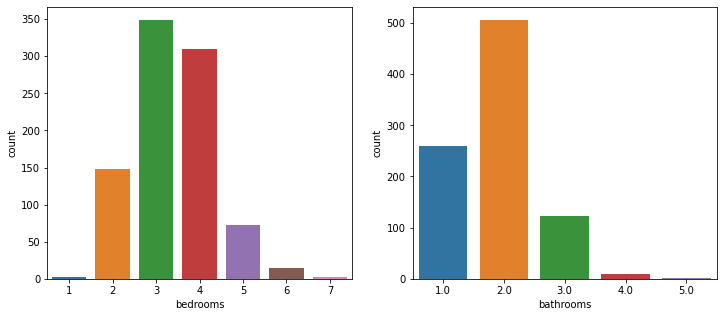

In [189]:
fig, ax =plt.subplots(1,2, figsize=(12,5))
sns.countplot(df['bedrooms'], ax=ax[0])
sns.countplot(df['bathrooms'], ax=ax[1])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='propertySubType', ylabel='count'>

[Text(0, 0, 'Semi-Detached'),
 Text(1, 0, 'Detached'),
 Text(2, 0, 'Penthouse'),
 Text(3, 0, 'Flat'),
 Text(4, 0, 'Apartment'),
 Text(5, 0, 'End of Terrace'),
 Text(6, 0, 'Town House'),
 Text(7, 0, 'Terraced'),
 Text(8, 0, 'House'),
 Text(9, 0, 'Detached Villa'),
 Text(10, 0, 'Barn Conversion'),
 Text(11, 0, 'Cottage'),
 Text(12, 0, 'Link Detached House'),
 Text(13, 0, 'Maisonette'),
 Text(14, 0, 'Mews'),
 Text(15, 0, 'Duplex'),
 Text(16, 0, 'Ground Flat'),
 Text(17, 0, 'Character Property'),
 Text(18, 0, 'Semi-detached Villa'),
 Text(19, 0, 'Chalet'),
 Text(20, 0, 'Villa')]

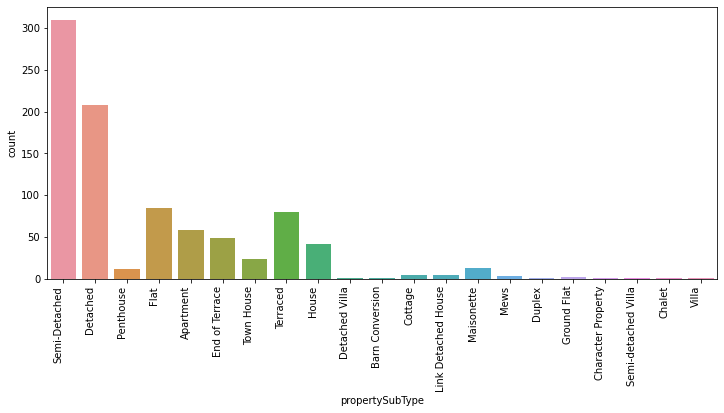

In [190]:
fig, ax =plt.subplots(1 ,figsize=(12,5))
sns.countplot(df['propertySubType'], ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")

In [196]:
df.dtypes

id                   int64
bedrooms             int64
bathrooms          float64
propertySubType     object
latitude           float64
longitude          float64
Price                int64
Specials            object
Price/Bedroom      float64
Postcode            object
dtype: object

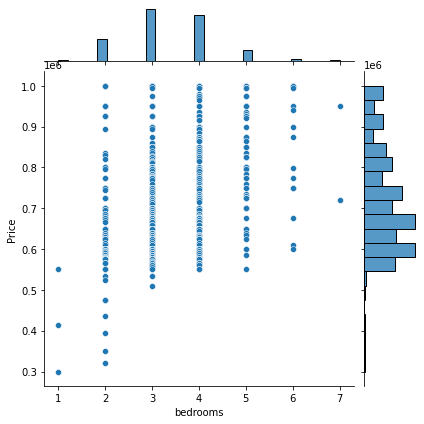

In [197]:
sns.jointplot(x='bedrooms', y='Price', data=df[['bedrooms','Price']])

<AxesSubplot:xlabel='bedrooms', ylabel='Price'>

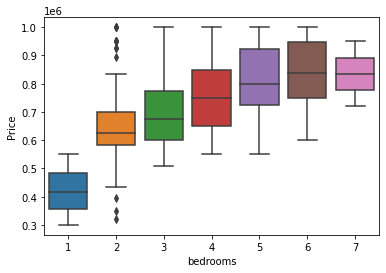

In [198]:
sns.boxplot(x='bedrooms', y='Price', data=df)

<AxesSubplot:xlabel='bedrooms', ylabel='Price/Bedroom'>

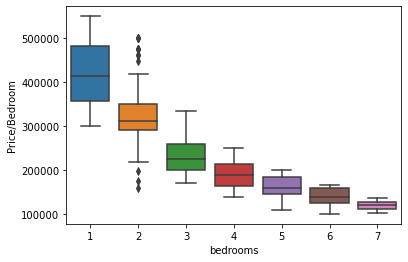

In [199]:
sns.boxplot(x='bedrooms', y='Price/Bedroom', data=df)

<Figure size 1080x720 with 0 Axes>

[Text(0, 0, 'KT17'),
 Text(1, 0, 'KT5'),
 Text(2, 0, 'KT15'),
 Text(3, 0, 'KT3'),
 Text(4, 0, 'KT10'),
 Text(5, 0, 'KT4'),
 Text(6, 0, 'KT7'),
 Text(7, 0, 'KT13'),
 Text(8, 0, 'KT18'),
 Text(9, 0, 'KT6'),
 Text(10, 0, 'KT9'),
 Text(11, 0, 'KT8'),
 Text(12, 0, 'KT1'),
 Text(13, 0, 'KT12'),
 Text(14, 0, 'KT22'),
 Text(15, 0, 'KT2'),
 Text(16, 0, 'KT14'),
 Text(17, 0, 'KT21'),
 Text(18, 0, 'KT23'),
 Text(19, 0, 'KT11'),
 Text(20, 0, 'KT16'),
 Text(21, 0, 'KT24'),
 Text(22, 0, 'KT19'),
 Text(23, 0, 'KT20')]

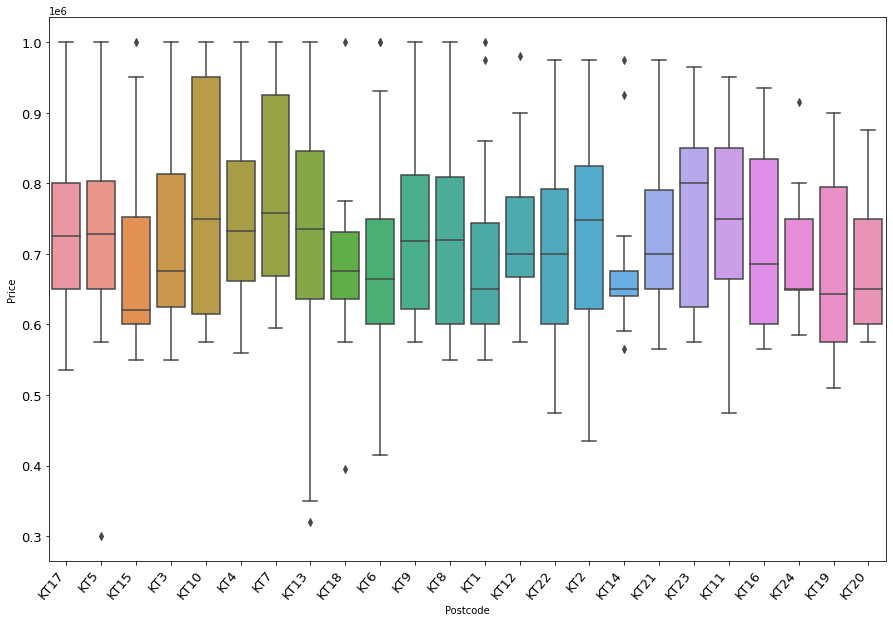

In [200]:
plt.figure(figsize=(15,10))
ax = sns.boxplot(x='Postcode', y='Price', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
ax.tick_params(labelsize=13)

<Figure size 1080x720 with 0 Axes>

[Text(0, 0, 'KT17'),
 Text(1, 0, 'KT5'),
 Text(2, 0, 'KT15'),
 Text(3, 0, 'KT3'),
 Text(4, 0, 'KT10'),
 Text(5, 0, 'KT4'),
 Text(6, 0, 'KT7'),
 Text(7, 0, 'KT13'),
 Text(8, 0, 'KT18'),
 Text(9, 0, 'KT6'),
 Text(10, 0, 'KT9'),
 Text(11, 0, 'KT8'),
 Text(12, 0, 'KT1'),
 Text(13, 0, 'KT12'),
 Text(14, 0, 'KT22'),
 Text(15, 0, 'KT2'),
 Text(16, 0, 'KT14'),
 Text(17, 0, 'KT21'),
 Text(18, 0, 'KT23'),
 Text(19, 0, 'KT11'),
 Text(20, 0, 'KT16'),
 Text(21, 0, 'KT24'),
 Text(22, 0, 'KT19'),
 Text(23, 0, 'KT20')]

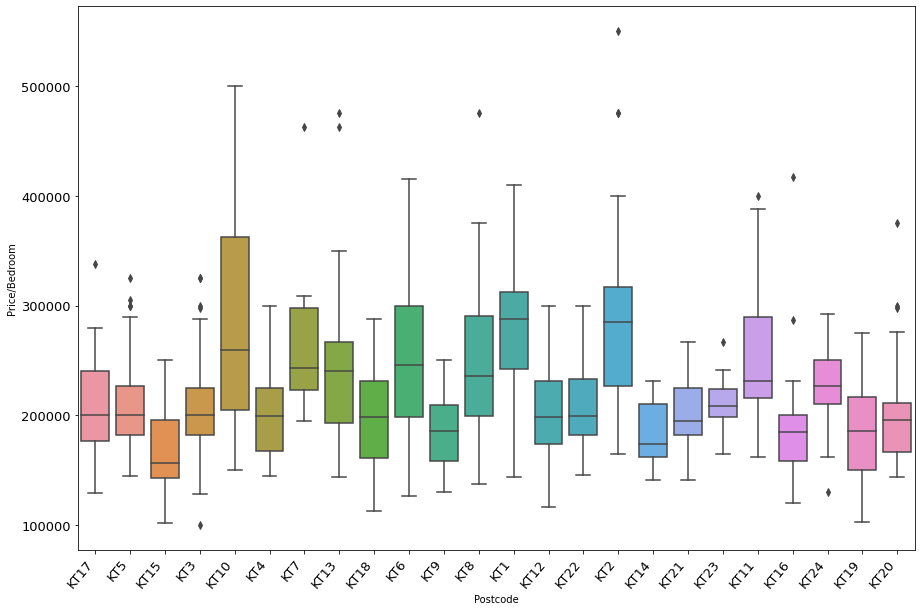

In [201]:
plt.figure(figsize=(15,10))
ax = sns.boxplot(x='Postcode', y='Price/Bedroom', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
ax.tick_params(labelsize=13)